In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as skpb

% matplotlib inline
import seaborn as sns
from matplotlib import rcParams

In [2]:
#Reading the data
data=pd.read_csv(r'C:\Users\pmt2\Documents\GitHub\GA-Projects\unit-4_project\Car data set for project_GA.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [4]:
data.interpolate(inplace=True)

In [5]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
data.fillna({'Engine Fuel Type' : 'Missing Type'}, inplace=True)

In [7]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
#To treat the missing values in that column
data['Market Category'].fillna(method= "bfill", inplace=True)

In [9]:
#Description of data
data.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11914,11914.000000,11914.000000,11914,11914,11914.000000,11914,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,11,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Flex Fuel,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1587,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.167324,5.630938,NaN,NaN,3.436210,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.031627,1.779365,NaN,NaN,0.881267,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [10]:
#Reviewing of data types
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [11]:
data.shape

(11914, 16)

In [12]:
#Converting the numbered categorical data into object type
data['Year']=data['Year'].astype('category')
data['Engine Fuel Type']=data['Engine Fuel Type'].astype('category')
data['Number of Doors']=data['Number of Doors'].astype('category')
data['Engine Cylinders']=data['Engine Cylinders'].astype('category')
data.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.0,11914,11914.000000,11914.0,11914,11914,11914.0,11914,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,28.0,11,NaN,11.0,5,4,3.0,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,2015.0,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,2170.0,7172,NaN,4752.0,8266,4787,8358.0,1587,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,249.167324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,NaN,NaN,109.031627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,NaN,NaN,170.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,NaN,NaN,227.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,NaN,NaN,300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [13]:
data['Driven_Wheels'].value_counts()

front wheel drive    4787
rear wheel drive     3371
all wheel drive      2353
four wheel drive     1403
Name: Driven_Wheels, dtype: int64

In [14]:
data.drop(['Driven_Wheels'], axis=1, inplace=True)

In [15]:
data['city mpg'].value_counts()

17     1230
16     1106
15     1038
18      997
19      841
20      795
21      638
14      634
22      634
13      617
23      500
24      466
25      444
12      302
27      260
11      225
26      216
28      176
30      130
31      122
29      101
10       83
9        33
41       29
32       22
36       20
34       20
40       19
44       18
42       17
       ... 
39        7
51        6
50        6
120       5
88        4
49        4
101       4
78        3
85        3
110       3
137       3
55        3
121       3
47        2
124       2
94        2
132       2
58        2
38        2
95        1
89        1
97        1
129       1
98        1
122       1
92        1
86        1
102       1
7         1
91        1
Name: city mpg, Length: 69, dtype: int64

In [16]:
data.drop(['city mpg'], axis=1, inplace=True)

In [17]:
data['highway MPG'].value_counts()

24     876
23     801
26     778
22     753
25     731
28     682
27     585
31     568
30     547
20     515
21     514
19     508
29     493
17     413
33     401
18     390
32     340
34     287
35     222
36     222
16     220
37     184
38     154
15     129
39     110
40     110
41      65
42      50
14      42
44      29
13      25
43      23
46      21
48      16
45      14
101     11
50      10
105      8
12       7
47       7
109      6
53       5
92       5
99       5
90       4
74       3
82       3
102      3
111      3
97       2
106      2
110      2
107      2
103      2
100      2
94       1
98       1
354      1
108      1
Name: highway MPG, dtype: int64

In [18]:
data['Engine Cylinders'].value_counts()

4.0     4752
6.0     4512
8.0     2036
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
9.0        1
7.0        1
Name: Engine Cylinders, dtype: int64

In [19]:
data.drop(['Engine Cylinders'], axis=1, inplace=True)

In [20]:
data['Number of Doors'].value_counts()

4.0    8358
2.0    3161
3.0     395
Name: Number of Doors, dtype: int64

In [21]:
data.drop(['Transmission Type','Vehicle Size','Vehicle Style','Number of Doors','Engine HP'], axis=1, inplace=True)

In [22]:
data.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Market Category,highway MPG,Popularity,MSRP
count,11914,11914,11914.0,11914,11914,11914.000000,11914.000000,1.191400e+04
unique,48,915,28.0,11,71,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,2015.0,regular unleaded,Flex Fuel,NaN,NaN,NaN
freq,1123,156,2170.0,7172,1587,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,26.637485,1554.911197,4.059474e+04
std,NaN,NaN,NaN,NaN,NaN,8.863001,1441.855347,6.010910e+04
min,NaN,NaN,NaN,NaN,NaN,12.000000,2.000000,2.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,22.000000,549.000000,2.100000e+04
50%,NaN,NaN,NaN,NaN,NaN,26.000000,1385.000000,2.999500e+04
75%,NaN,NaN,NaN,NaN,NaN,30.000000,2009.000000,4.223125e+04


In [23]:
data.shape

(11914, 8)

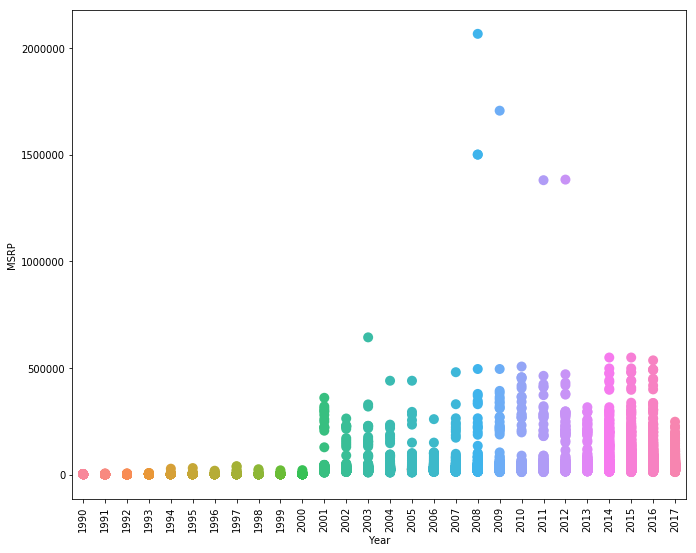

In [24]:
%matplotlib inline
size=(11,9)
plt.subplots(figsize=size)
plt.xticks(rotation=90)
sns.stripplot(x='Year',y='MSRP',data=data,size=10)
# After Year 2000, there is a sharp increase in the price 
#There are no cars available at high price before 2001 or no data was collected for cars with high price.

In [25]:
data_corr = data.corr()
data_corr

,highway MPG,Popularity,MSRP
highway MPG,1.000000,-0.020991,-0.160043
Popularity,-0.020991,1.000000,-0.048476
MSRP,-0.160043,-0.048476,1.000000


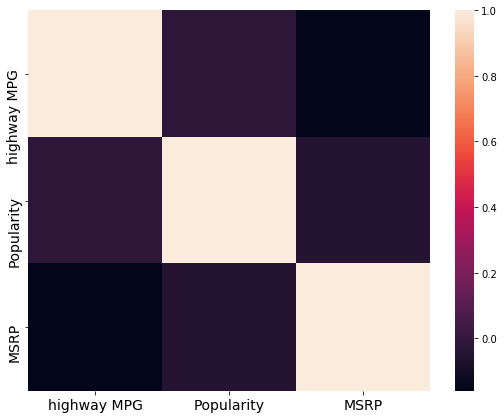

In [26]:
# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
#ax = sns.heatmap(data_corr, mask=mask, ax=ax)
ax = sns.heatmap(data_corr)
# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [27]:
#getting categorical variables into dummies
data=pd.get_dummies(data,dummy_na=False,columns=['Make','Model','Engine Fuel Type','Market Category'])


In [28]:
from sklearn.preprocessing import StandardScaler
Labels=np.array(data['MSRP'])
Features=data.drop('MSRP',axis=1)
Features=np.array(Features)
X = Features
y = Labels
X = StandardScaler().fit_transform(X)

C:\Users\pmt2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmt2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
#Random forest model training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=99)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8339, 1048)
(3575, 1048)
(8339,)
(3575,)


In [30]:
from sklearn.ensemble import RandomForestRegressor
RFTree=RandomForestRegressor(n_estimators=500,random_state=99)
RFTree.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=99, verbose=0, warm_start=False)

Mean Absolute Error: 2208.11


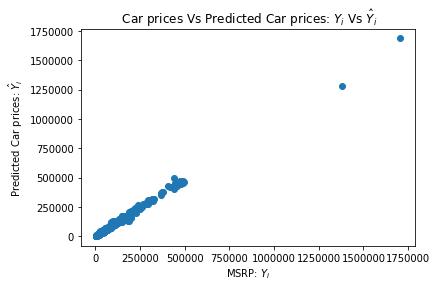

In [31]:
#prediction using model

y_pred = RFTree.predict(X_test)
errors=abs(y_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))


plt.scatter(y_test, y_pred)
plt.xlabel("MSRP: $Y_i$")
plt.ylabel("Predicted Car prices: $\hat{Y}_i$")
plt.title(" Car prices Vs Predicted Car prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()


In [122]:
#Cross Validation
from sklearn.model_selection import cross_val_score
CV_score=cross_val_score(RFTree,X_test,y_test,cv=5)
print('CV Score:',CV_score)

CV Score: [0.94372427 0.84956643 0.64965787 0.9448985  0.48317072]


In [123]:
from sklearn.metrics import mean_squared_error
import numpy as np
print(np.sqrt(mean_squared_error(y_test,y_pred)))


4516.101114112701


In [ ]:
Conclusion:By using this model we can predit the Car prices given the features like Make,model..etc
